In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df =pd.read_excel(r'Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


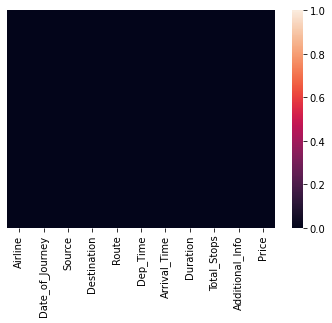

In [ ]:
#df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format =‘%d-%m-%Y’ ).dt.day
df["Date_of_Journey"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df.head()
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
df.head()
dur=[]
for i in df['Duration']:
  if len(i.split())!=2:
    dur.append(int(i.split()[0][0:-1]))
  else:
    x=int(i.split()[0][0:-1])
    x+=int(i.split()[1][0:-1])/60
    dur.append(round(x,2))
df['Duration']=dur
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2.83,non-stop,No info,3897
1,Air India,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2 stops,No info,7662
2,Jet Airways,9,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2 stops,No info,13882
3,IndiGo,12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1 stop,No info,6218
4,IndiGo,1,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1 stop,No info,13302


In [ ]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24,Banglore,New Delhi,22:20,01:10 22 Mar,2.83,non-stop,3897
1,Air India,1,Kolkata,Banglore,05:50,13:15,7.42,2 stops,7662
2,Jet Airways,9,Delhi,Cochin,09:25,04:25 10 Jun,19.00,2 stops,13882
3,IndiGo,12,Kolkata,Banglore,18:05,23:30,5.42,1 stop,6218
4,IndiGo,1,Banglore,New Delhi,16:50,21:35,4.75,1 stop,13302


In [ ]:

d=[]
for i in df['Total_Stops']:
  if i not in ['non-stop', '2 stops', '1 stop', '3 stops', 'nan', '4 stops']:
    d.append(0)
  else:
    d.append(i)
df['Total_Stops']=d

In [ ]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [ ]:

df["Arrival_Time"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Dep_Time"] = pd.to_datetime(df.Dep_Time).dt.hour


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24,Banglore,New Delhi,22,1,2.83,0,3897
1,Air India,1,Kolkata,Banglore,5,13,7.42,2,7662
2,Jet Airways,9,Delhi,Cochin,9,4,19.00,2,13882
3,IndiGo,12,Kolkata,Banglore,18,23,5.42,1,6218
4,IndiGo,1,Banglore,New Delhi,16,21,4.75,1,13302


In [ ]:
x=pd.get_dummies(df[['Airline']], drop_first=True)
y=pd.get_dummies(df[['Source']], drop_first=True)
z=pd.get_dummies(df[['Destination']], drop_first=True)
df = pd.concat([df,x, y, z], axis = 1)
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
df=df[['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Price']]
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,24,22,1,2.83,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897
1,1,5,13,7.42,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662
2,9,9,4,19.00,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882
3,12,18,23,5.42,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218
4,1,16,21,4.75,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302


In [ ]:

X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [ ]:
X

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24,22,1,2.83,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,5,13,7.42,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9,9,4,19.00,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12,18,23,5.42,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,16,21,4.75,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,19,22,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,27,20,23,2.58,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,27,8,11,3.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,1,11,14,2.67,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)


from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg_rf.fit(xtrain, ytrain)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
pred=reg_rf.predict(xtest)
pred

array([13583.86147619,  5497.22766667, 12733.88190476, ...,
        6590.85190476,  4823.        , 13876.5605    ])

In [ ]:
reg_rf.score(xtrain,ytrain)

0.9163464334603134

In [ ]:
reg_rf.score(xtest, ytest)

0.7251704276963251

In [ ]:
from sklearn import metrics
metrics.r2_score(ytest, pred)


0.7251704276963251

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:

rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
prediction = rf_random.predict(xtest)
rf_random.best_params_


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


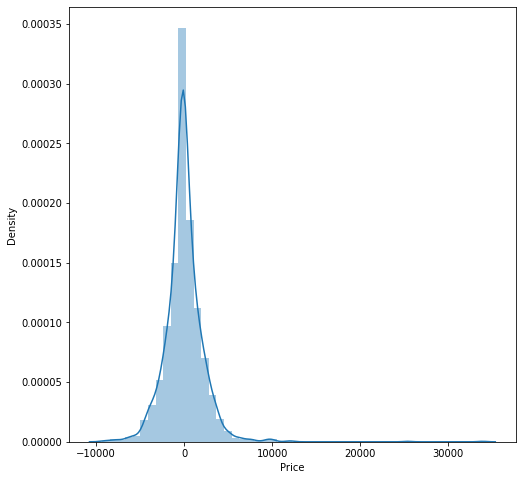

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
sns.distplot(ytest-prediction)
plt.show()

In [ ]:
metrics.r2_score(ytest, prediction)

0.7594890159773873